In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [58]:
data=pd.read_excel(r'C:\Users\Archita Biswas\Dropbox\My PC (LAPTOP-ILMTPGHN)\Documents\Student Adaptivity level on online education.xlsx')
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,No,Mobile,Moderate
3,Girl,10-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,No,Mobile,Low


In [59]:
data.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

In [60]:
data.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [61]:
data["Adaptivity Level"].value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

In [62]:
top_prod = data.groupby('Adaptivity Level').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False)
fig = px.pie(top_prod, values='total', names='Adaptivity Level', color_discrete_sequence=px.colors.sequential.thermal, title="Students' adaptivity level")
fig.show()

In [63]:
data['weight'] = 1
data['IT Student'] = data['IT Student'].map({'Yes':'IT Student','No':'Non-IT Student'})
fig = px.sunburst(data_frame = data[['IT Student','Adaptivity Level','weight']].groupby(['IT Student','Adaptivity Level']).sum().reset_index(), path=['IT Student','Adaptivity Level'], values='weight', title='Was it easier for IT students to adapt for the Online learning?',color_discrete_sequence=px.colors.sequential.Electric)
fig.show()

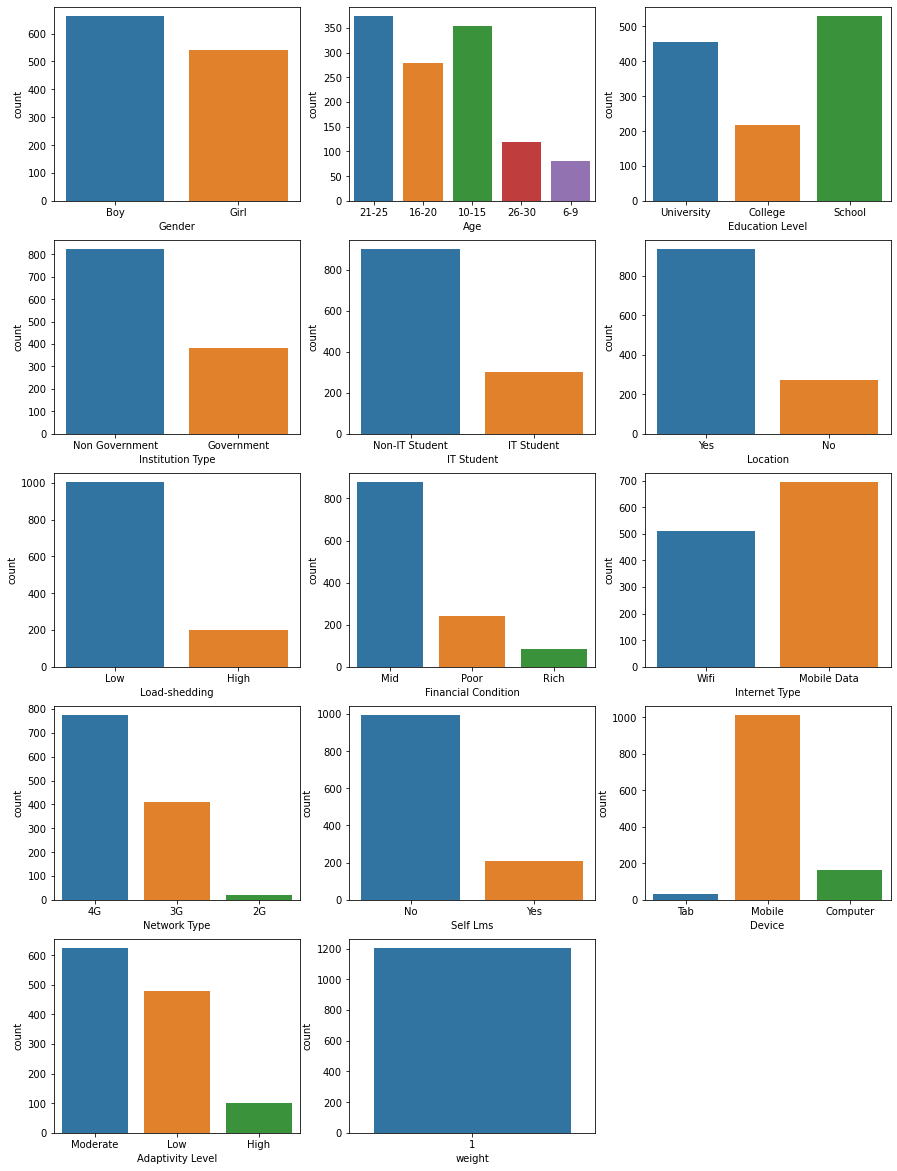

In [36]:
i = 1
plt.figure(figsize = (15,25))
for feature in data:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = data)
    i +=1

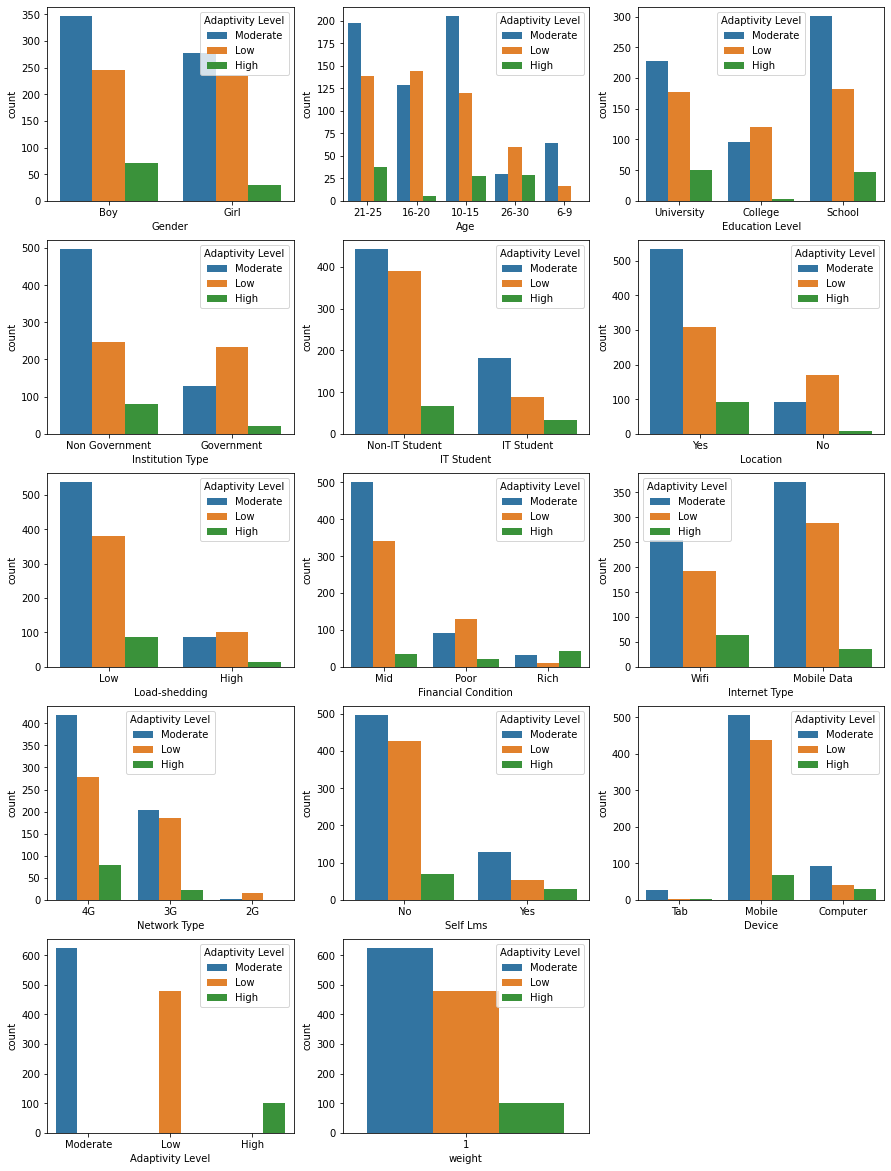

In [37]:
i = 1
plt.figure(figsize = (15,25))
for feature in data:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Adaptivity Level', data = data)
    i +=1

In [56]:
fig = px.bar(data, x="Education Level", y="weight", color="Adaptivity Level", title="Does education level increase adaptivity of the students?")
fig.show()

In [39]:
fig = px.bar(data, x="Network Type", y="weight", color="Adaptivity Level", title="Does network type increase adaptivity of the students?")
fig.show()

In [40]:
fig = px.bar(data, x="Institution Type", y="weight", color="Adaptivity Level", title="Does institution type increase adaptivity of the students?")
fig.show()

In [41]:
fig = px.bar(data, x="Device", y="weight", color="Adaptivity Level", title="Does device increase adaptivity of the students?")
fig.show()

In [42]:
fig = px.bar(data, x="Location", y="weight", color="Adaptivity Level", title="Does location increase adaptivity of the students?")
fig.show()

In [43]:
fig = px.bar(data, x="Financial Condition", y="weight", color="Adaptivity Level", title="Does financial condition increase adaptivity of the students?")
fig.show()

In [44]:
fig = px.bar(data, x="Internet Type", y="weight", color="Adaptivity Level", title="Does internet type increase adaptivity of the students?")
fig.show()

In [45]:
fig = px.bar(data, x="Self Lms", y="weight", color="Adaptivity Level", title="Does self lms increase adaptivity of the students?")
fig.show()

In [46]:
fig = px.bar(data, x="Load-shedding", y="weight", color="Adaptivity Level", title="Let's see how load-shedding is linked to the adaptivity level")
fig.show()

In [64]:
data.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Self Lms', 'Device', 'Adaptivity Level', 'weight'],
      dtype='object')

In [66]:
from sklearn.preprocessing import LabelEncoder
le_Gender = LabelEncoder()
le_Age = LabelEncoder()
le_Educationlevel = LabelEncoder()
le_Institutiontype = LabelEncoder()
le_ITStudent = LabelEncoder()
le_Location = LabelEncoder()
le_Loadshedding = LabelEncoder()
le_Financialcondition = LabelEncoder()
le_Internettype = LabelEncoder()
le_Networktype = LabelEncoder()
le_Selflms = LabelEncoder()
le_Device = LabelEncoder()


data['Age']= le_Age.fit_transform(data['Age'])
data['Gender']= le_Gender.fit_transform(data['Gender'])
data['Education Level']= le_Educationlevel.fit_transform(data['Education Level'])
data['Institution Type']= le_Institutiontype.fit_transform(data['Institution Type'])
data['IT Student']= le_ITStudent.fit_transform(data['IT Student'])
data['Location']= le_Location.fit_transform(data['Location'])
data['Load-shedding']= le_Loadshedding.fit_transform(data['Load-shedding'])
data['Financial Condition']= le_Financialcondition.fit_transform(data['Financial Condition'])
data['Internet Type']= le_Internettype.fit_transform(data['Internet Type'])
data['Network Type']= le_Networktype.fit_transform(data['Network Type'])
data['Self Lms']= le_Selflms.fit_transform(data['Self Lms'])
data['Device']= le_Device.fit_transform(data['Device'])


In [67]:
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level,weight
0,0,2,2,1,1,1,1,0,1,2,0,2,Moderate,1
1,1,2,2,1,1,1,0,0,0,2,1,1,Moderate,1
2,1,1,0,0,1,1,1,0,1,2,0,1,Moderate,1
3,1,0,1,1,1,1,1,0,0,2,0,1,Moderate,1
4,1,1,1,1,1,1,1,1,0,1,0,1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,1,0,1,1,1,1,0,1,2,0,1,Low,1
1201,1,1,0,1,1,0,0,0,1,2,0,1,Moderate,1
1202,0,0,1,1,1,1,1,0,0,1,0,1,Moderate,1
1203,1,1,0,1,1,0,1,0,1,2,0,1,Low,1


In [68]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Adaptivity Level']=label_encoder.fit_transform(data['Adaptivity Level'])
data['Adaptivity Level'].unique()

array([2, 1, 0])

In [69]:
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level,weight
0,0,2,2,1,1,1,1,0,1,2,0,2,2,1
1,1,2,2,1,1,1,0,0,0,2,1,1,2,1
2,1,1,0,0,1,1,1,0,1,2,0,1,2,1
3,1,0,1,1,1,1,1,0,0,2,0,1,2,1
4,1,1,1,1,1,1,1,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,1,0,1,1,1,1,0,1,2,0,1,1,1
1201,1,1,0,1,1,0,0,0,1,2,0,1,2,1
1202,0,0,1,1,1,1,1,0,0,1,0,1,2,1
1203,1,1,0,1,1,0,1,0,1,2,0,1,1,1


In [70]:
data.groupby(['Adaptivity Level']).mean()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,weight
Adaptivity Level,,,,,,,,,,,,,
0,0.290000,1.680000,1.470000,0.8000,0.670000,0.92000,0.870000,1.060000,0.6400,1.780000,0.300000,0.720000,1
1,0.489583,1.395833,1.120833,0.5125,0.814583,0.64375,0.791667,0.310417,0.4000,1.545833,0.108333,0.920833,1
2,0.444800,1.390400,1.211200,0.7952,0.708800,0.85440,0.859200,0.251200,0.4064,1.665600,0.204800,0.894400,1


In [71]:
data.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level,weight
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.0
mean,0.449793,1.416598,1.196680,0.682988,0.747718,0.775934,0.833195,0.341909,0.423237,1.627386,0.174274,0.890456,1.435685,1.0
std,0.497679,1.196225,0.722437,0.465506,0.434503,0.417139,0.372956,0.605302,0.494277,0.515295,0.379502,0.384003,0.642013,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.0
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.0
75%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,2.000000,1.0
max,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.0


In [72]:
data.nunique()

Gender                 2
Age                    5
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Self Lms               2
Device                 3
Adaptivity Level       3
weight                 1
dtype: int64

<AxesSubplot:>

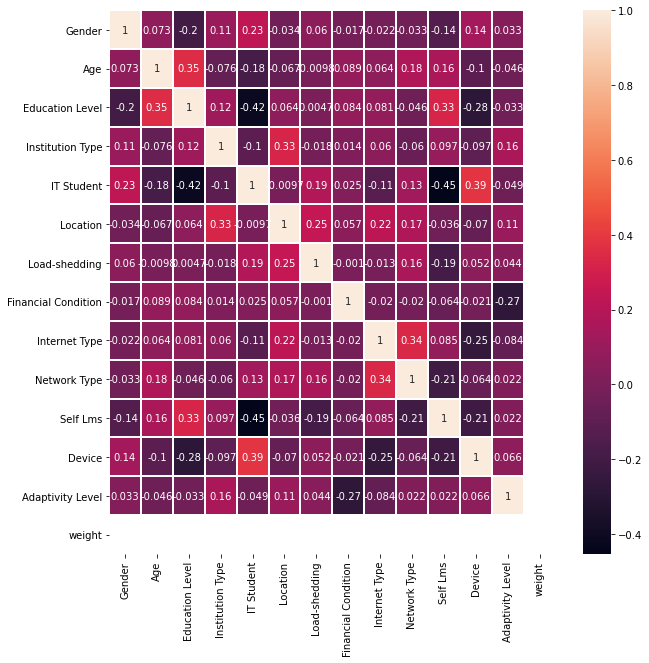

In [75]:
correlation=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,linewidth = 1, xticklabels=correlation.columns, yticklabels=correlation.columns,
           annot=True)

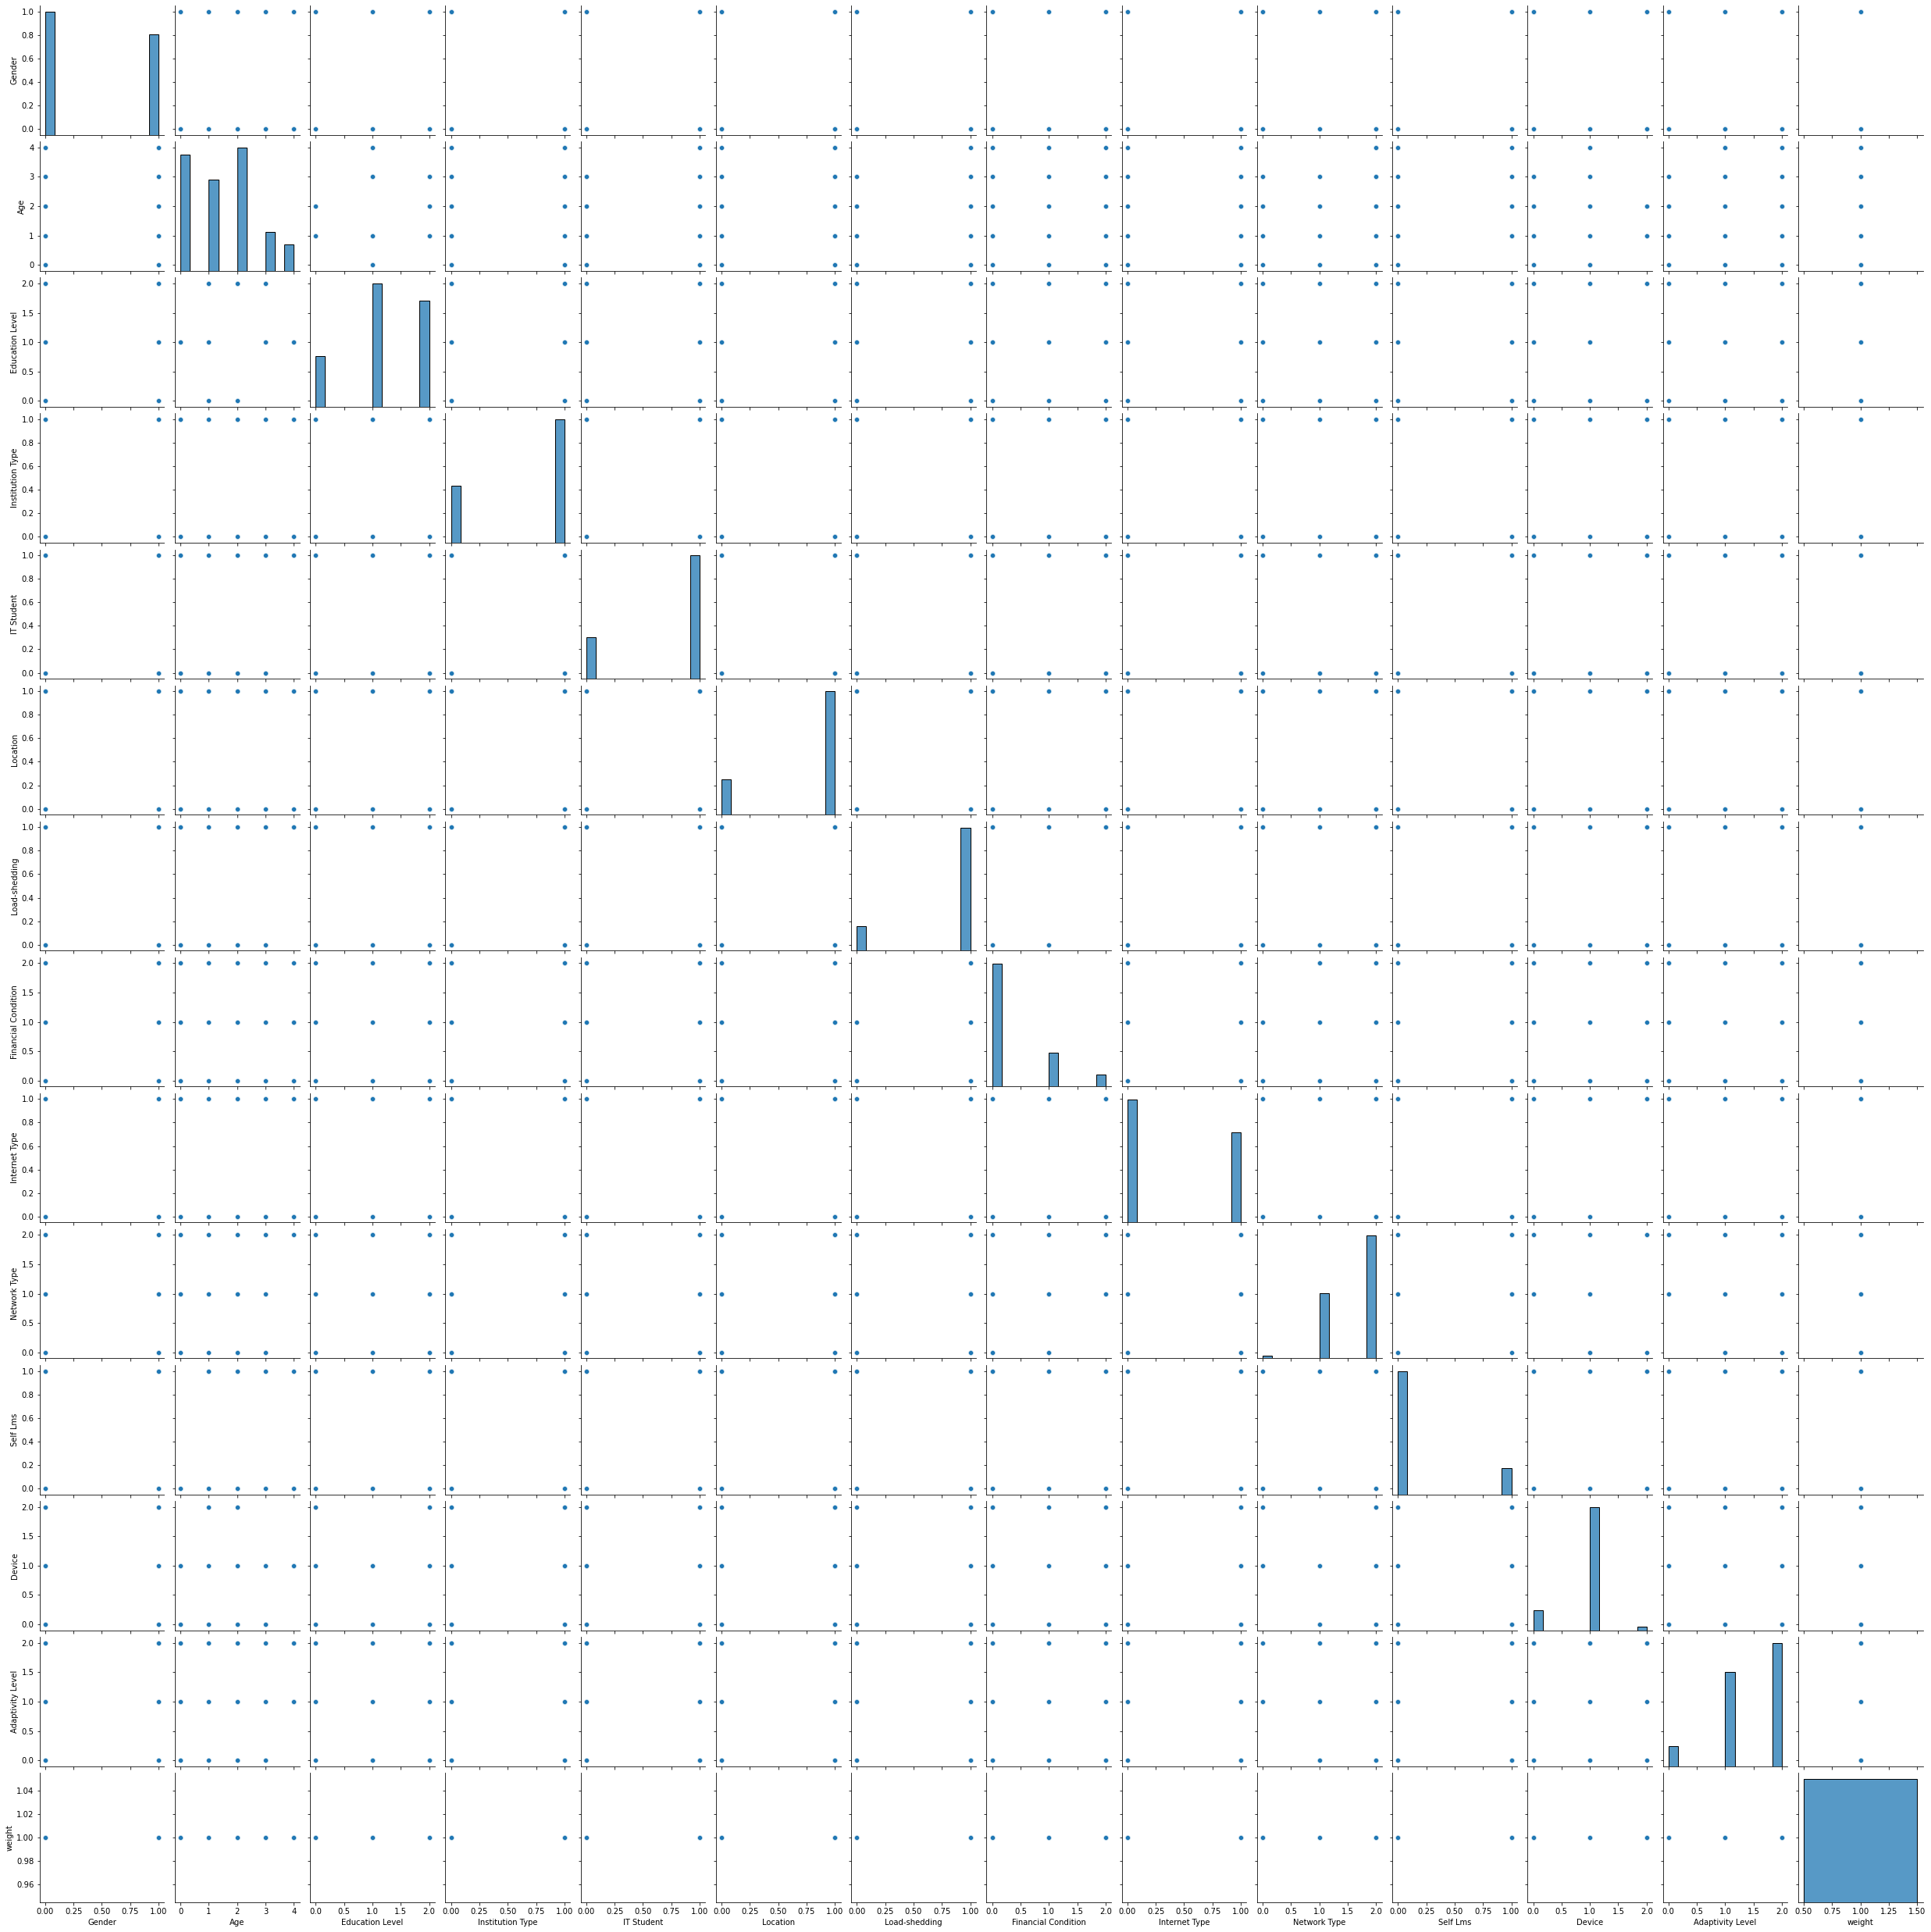

In [406]:
sns.pairplot(data)

In [407]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=['weight','Adaptivity Level']),data['Adaptivity Level'])

In [408]:
lr = LogisticRegression(solver='newton-cg').fit(X_train,y_train)
print('train data report')
print(classification_report(lr.predict(X_train),y_train))
print('test data report')
print(classification_report(lr.predict(X_test),y_test))
lr_tr_ac1=lr.score(X_train,y_train)
print(lr_tr_ac1)
lr_te_ac1=lr.score(X_test,y_test)
print(lr_te_ac1)

train data report
              precision    recall  f1-score   support

           0       0.45      0.71      0.55        51
           1       0.52      0.64      0.57       291
           2       0.78      0.65      0.71       561

    accuracy                           0.65       903
   macro avg       0.58      0.66      0.61       903
weighted avg       0.68      0.65      0.65       903

test data report
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        20
           1       0.48      0.57      0.52       103
           2       0.74      0.66      0.70       179

    accuracy                           0.62       302
   macro avg       0.58      0.58      0.58       302
weighted avg       0.64      0.62      0.63       302

0.646733111849391
0.6225165562913907


Text(0.5, 1.0, 'Confusion Matrix')

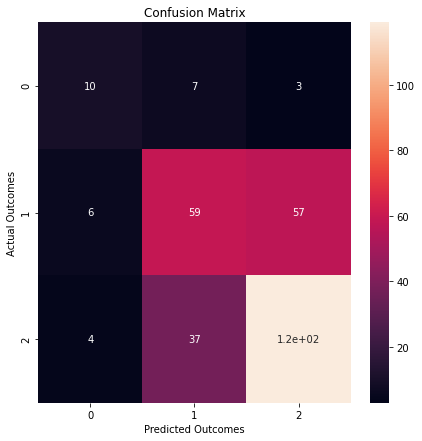

In [409]:

cm=confusion_matrix(y_test,lr.predict(X_test))
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Outcomes')
plt.ylabel('Actual Outcomes')
plt.title('Confusion Matrix')

In [410]:
parameters = {'max_depth':[4,5,6,7,8,10,15,20,25],'n_estimators':[10,15,20,30,35],'min_samples_split':[2,5,10,15,20]}
gc = GridSearchCV(RandomForestClassifier(),parameters).fit(X_train,y_train)
print(gc.best_params_)

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 15}


In [413]:
rf = RandomForestClassifier(n_estimators=15,min_samples_split=2,max_depth=15).fit(X_train,y_train)
print("Train data:")
print(classification_report(rf.predict(X_train),y_train))
print("Test data:")
print(classification_report(rf.predict(X_test),y_test))
rf_tr_ac1=rf.score(X_train,y_train)
print(rf_tr_ac1)
rf_te_ac1=rf.score(X_test,y_test)
print(rf_te_ac1)

Train data:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        74
           1       0.93      0.90      0.91       372
           2       0.89      0.91      0.90       457

    accuracy                           0.90       903
   macro avg       0.87      0.88      0.87       903
weighted avg       0.90      0.90      0.90       903

Test data:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        26
           1       0.90      0.85      0.87       130
           2       0.86      0.94      0.90       146

    accuracy                           0.88       302
   macro avg       0.89      0.83      0.85       302
weighted avg       0.88      0.88      0.88       302

0.8981173864894795
0.8774834437086093


Text(0.5, 1.0, 'Confusion Matrix')

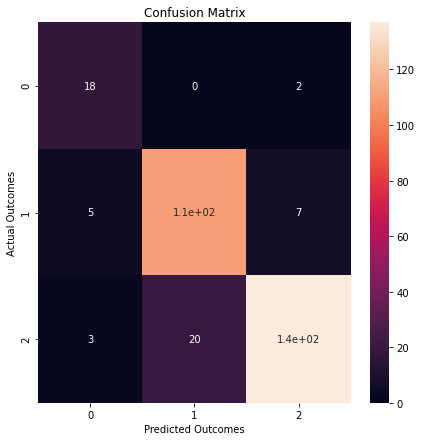

In [414]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,rf.predict(X_test))
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Outcomes')
plt.ylabel('Actual Outcomes')
plt.title('Confusion Matrix')

In [415]:
parameters = {'learning_rate':[0.001,0.01,0.1,1,2,3,4,5],'n_estimators':[10,15,20,30,35]}
gc = GridSearchCV(AdaBoostClassifier(),parameters).fit(X_train,y_train)
print(gc.best_params_)

{'learning_rate': 1, 'n_estimators': 35}


In [416]:
AB = AdaBoostClassifier(n_estimators=35).fit(X_train,y_train)
print('Train data:')
print(classification_report(AB.predict(X_train),y_train))
print('Test data:')
print(classification_report(AB.predict(X_test),y_test))
AB_tr_ac1=AB.score(X_train,y_train)
print(AB_tr_ac1)
AB_te_ac1=AB.score(X_test,y_test)
print(AB_te_ac1)

Train data:
              precision    recall  f1-score   support

           0       0.31      0.60      0.41        42
           1       0.59      0.61      0.60       347
           2       0.72      0.65      0.68       514

    accuracy                           0.63       903
   macro avg       0.54      0.62      0.56       903
weighted avg       0.65      0.63      0.64       903

Test data:
              precision    recall  f1-score   support

           0       0.30      0.33      0.32        18
           1       0.53      0.59      0.56       111
           2       0.70      0.65      0.67       173

    accuracy                           0.61       302
   macro avg       0.51      0.52      0.52       302
weighted avg       0.61      0.61      0.61       302

0.6312292358803987
0.6059602649006622


Text(0.5, 1.0, 'Confusion Matrix')

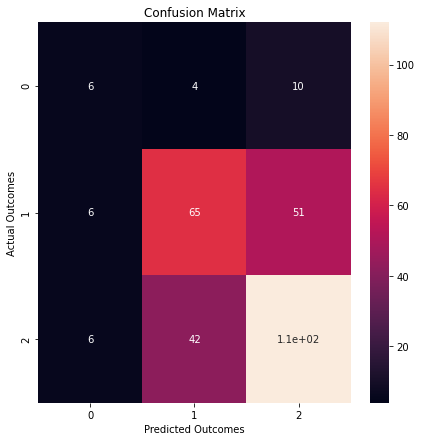

In [417]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,AB.predict(X_test))
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Outcomes')
plt.ylabel('Actual Outcomes')
plt.title('Confusion Matrix')

In [418]:
gc = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[1,2,5,10,20,15,25,30,35,40,45,50,55,60],'weights':['uniform', 'distance']}).fit(X_train,y_train)
print(gc.best_params_)

{'n_neighbors': 40, 'weights': 'distance'}


In [419]:
KNN = KNeighborsClassifier(n_neighbors=40,weights="distance").fit(X_train,y_train)
print('Train')
print(classification_report(KNN.predict(X_train),y_train))
print('Test')
print(classification_report(KNN.predict(X_test),y_test))
KNN_tr_ac1=KNN.score(X_train,y_train)
print(KNN_tr_ac1)
KNN_te_ac1=KNN.score(X_test,y_test)
print(KNN_te_ac1)

Train
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        80
           1       0.92      0.91      0.91       361
           2       0.90      0.91      0.90       462

    accuracy                           0.90       903
   macro avg       0.88      0.88      0.88       903
weighted avg       0.90      0.90      0.90       903

Test
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.86      0.86      0.86       122
           2       0.87      0.90      0.88       155

    accuracy                           0.87       302
   macro avg       0.88      0.83      0.85       302
weighted avg       0.87      0.87      0.87       302

0.8992248062015504
0.8675496688741722


Text(0.5, 1.0, 'Confusion Matrix')

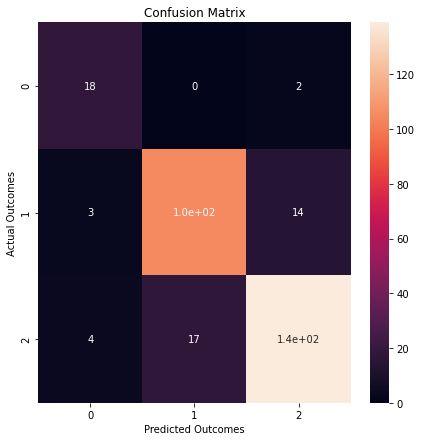

In [420]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,KNN.predict(X_test))
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Outcomes')
plt.ylabel('Actual Outcomes')
plt.title('Confusion Matrix')

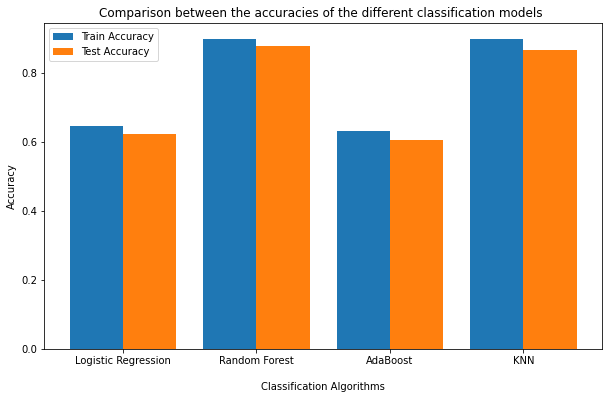

In [421]:
X = ['Logistic Regression','Random Forest','AdaBoost','KNN']
Y = [lr_tr_ac1,rf_tr_ac1,AB_tr_ac1,KNN_tr_ac1]
Z = [lr_te_ac1,rf_te_ac1,AB_te_ac1,KNN_te_ac1]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Test Accuracy')
  
plt.xticks(X_axis, X)
plt.xlabel("\nClassification Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison between the accuracies of the different classification models ")
plt.legend()
plt.show()

In [422]:
rf.predict(X_test)

array([1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2,
       1, 0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2,

In [423]:
np.array(y_test - (rf.predict(X_test)))

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -2,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,
        0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0